### DECISION BOUNDARY AND THE C PARAMETER

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y = [0,0,0,0,1,1,1,1,1,1,1,1,1]

In [3]:
X = np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y = [0,1,0,0,1,1,1,1,1,1,1,1,1]

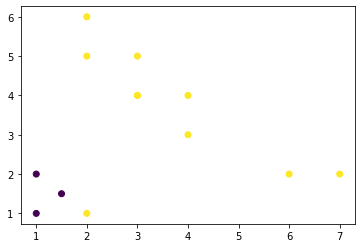

In [4]:
X_x1 = X[:,0]
X_x2 = X[:,1]
plt.scatter(X_x1, X_x2, c = y)
plt.show()

In [13]:
svcLinear =  SVC(kernel='linear', C=1000).fit(X, y) # analyse in case of c=1 and c=1000 for the second datasets i.4
                                                      # in cell 3
svcLinear.coef_, svcLinear.intercept_

(array([[3.99804688e+00, 2.22044605e-16]]), array([-6.99633789]))

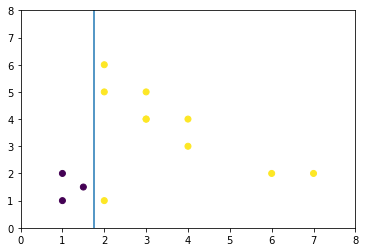

In [14]:
x1 = np.array([0, 5])
x2 = -1 *(svcLinear.intercept_ + svcLinear.coef_[0][0] * x1)/svcLinear.coef_[0][1]
plt.plot(x1, x2)
plt.scatter(X_x1, X_x2, c = y)
plt.axis([0, 8, 0, 8])
plt.show()

### USING SKLEARN ON IRIS

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [43]:
iris = datasets.load_iris()
x = iris.data[:,0:2]
y = iris.target

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [45]:
clf = SVC()
clf.fit(x_train, y_train)

C:\Users\jhasa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
clf.score(x_test, y_test)

0.8157894736842105

In [66]:
def makegrid(x1,x2,h=0.02):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    a = np.arange(x1_min, x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a, b)
    return xx, yy

In [35]:
x1 = np.array([1, 3])
x2 = np.array([5, 6])
xx,yy = makegrid(x1, x2)

In [36]:
xx.ravel()

array([0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98])

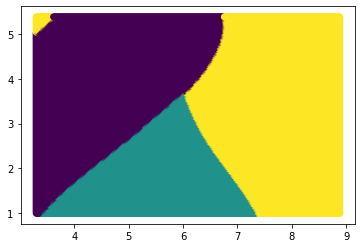

In [49]:
xx, yy = makegrid(x[:,0], x[:,1])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c=predictions)
plt.show()

### GRID SEARCH

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [57]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [58]:
clf = KNeighborsClassifier()
grid = {"n_neighbors" : [3,5,7,9,11]}
abc = GridSearchCV(clf, grid)
abc.fit(x_train,y_train)

C:\Users\jhasa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jhasa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
abc.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [60]:
abc.cv_results_

{'mean_fit_time': array([0.00093834, 0.0003322 , 0.00100732, 0.00098133, 0.00066368]),
 'std_fit_time': array([1.53009797e-04, 4.69796871e-04, 9.30341760e-06, 1.21699082e-04,
        4.69294753e-04]),
 'mean_score_time': array([0.00262896, 0.00232649, 0.00299565, 0.00460132, 0.00465743]),
 'std_score_time': array([5.13629631e-04, 4.70022017e-04, 1.12391596e-06, 4.59885907e-04,
        4.34565213e-04]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'split0_test_score': array([0.94871795, 0.94871795, 0.97435897, 1.        , 0.97435897]),
 'split1_test_score': array([1.        , 1.        , 0.97297297, 0.97297297, 0.97297297]),
 'split2_test_score': array([0.97222222, 0.97222222, 0.97222222, 0.97222222, 0.97222222]),
 'mean_test_score': array([0.9732